In [1]:
import pandas as pd


In [2]:

precos_planos = {
    "Plano 1": 1500,
    "Plano 2": 2000,
    "Plano 3": 2500
}


dados = {
    "Mês": ["Janeiro", "Fevereiro", "Março"],
    "Quantidade de Dentistas": [10, 12, 8],
    "Plano 1": [3, 4, 2],
    "Plano 2": [5, 5, 3],
    "Plano 3": [2, 3, 3],
    "Despesas Fixas": [5000, 6000, 4500],
    "Comissões dos SDRs": [2000, 2500, 1800],
    "Salário CTO": [3000, 3500, 2800]
}

df = pd.DataFrame(dados)


In [3]:
df['Faturamento Plano 1'] = df['Plano 1'] * precos_planos["Plano 1"]
df['Faturamento Plano 2'] = df['Plano 2'] * precos_planos["Plano 2"]
df['Faturamento Plano 3'] = df['Plano 3'] * precos_planos["Plano 3"]

df['Faturamento Total'] = df['Faturamento Plano 1'] + df['Faturamento Plano 2'] + df['Faturamento Plano 3']

df['Lucro Líquido'] = df['Faturamento Total'] - (df['Despesas Fixas'] + df['Comissões dos SDRs'] + df['Salário CTO'])


In [4]:
df

,Mês,Quantidade de Dentistas,Plano 1,Plano 2,Plano 3,Despesas Fixas,Comissões dos SDRs,Salário CTO,Faturamento Plano 1,Faturamento Plano 2,Faturamento Plano 3,Faturamento Total,Lucro Líquido
0,Janeiro,10,3,5,2,5000,2000,3000,4500,10000,5000,19500,9500
1,Fevereiro,12,4,5,3,6000,2500,3500,6000,10000,7500,23500,11500
2,Março,8,2,3,3,4500,1800,2800,3000,6000,7500,16500,7400


In [5]:
import matplotlib.pyplot as plt

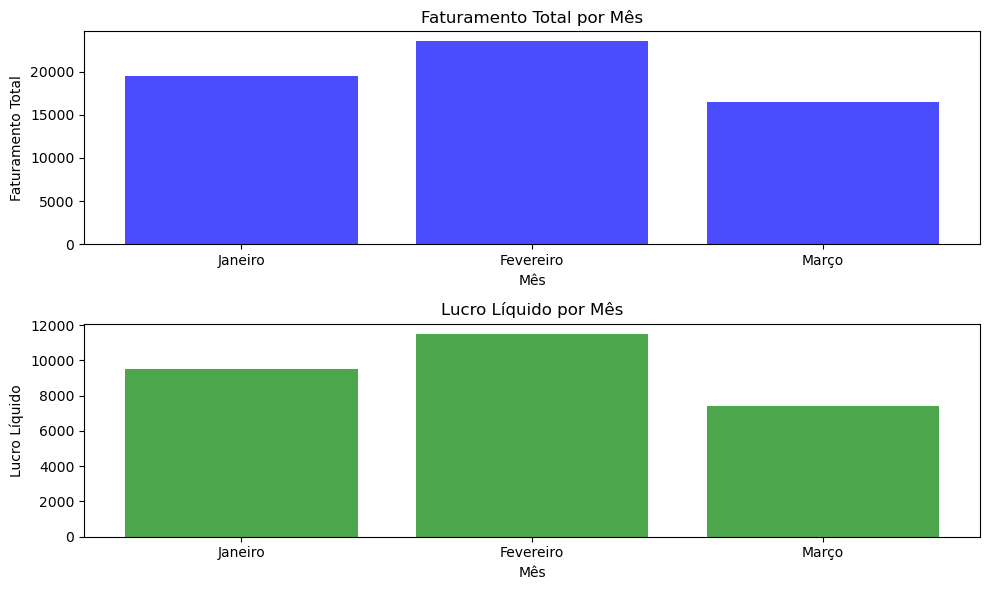

In [7]:

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)  # 2 linhas, 1 coluna, primeiro gráfico
plt.bar(df['Mês'], df['Faturamento Total'], color='blue', alpha=0.7)
plt.title('Faturamento Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Faturamento Total')

plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, segundo gráfico
plt.bar(df['Mês'], df['Lucro Líquido'], color='green', alpha=0.7)
plt.title('Lucro Líquido por Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro Líquido')

plt.tight_layout()

plt.show()


In [8]:
plt.savefig('faturamento_lucro.png')  


<Figure size 640x480 with 0 Axes>

In [9]:
!pip install python-docx


   ---------------------------------------- 0.0/244.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/244.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/244.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/244.3 kB 330.3 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/244.3 kB 655.4 kB/s eta 0:00:01
   ---------------------------------------- 244.3/244.3 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.4/3.8 MB 8.5 MB/s eta 0:00:01
   --------- ------------------------------ 0.9/3.8 MB 10.9 MB/s eta 0:00:01
   ------------------- -------------------- 1.9/3.8 MB 13.3 MB/s eta 0:00:01
   ---------------------- ----------------- 2.2/3.8 MB 11.6 MB/s eta 0:00:01
   ------------------------------ --------- 2.9/3.8 MB 12.4 MB/s eta 0:00:01
   ------------------------------------ --- 3.5/3.8 MB 12.4 MB/s eta 0:00:01
   -------------

In [10]:
from docx import Document
from docx.shared import Inches

In [11]:
doc = Document()
doc.add_heading('Relatório Financeiro da Contento', level=1)


In [12]:
table = doc.add_table(rows=1, cols=len(df.columns))
hdr_cells = table.rows[0].cells
for i, column in enumerate(df.columns):
    hdr_cells[i].text = column

for index, row in df.iterrows():
    row_cells = table.add_row().cells
    for i, value in enumerate(row):
        row_cells[i].text = str(value)

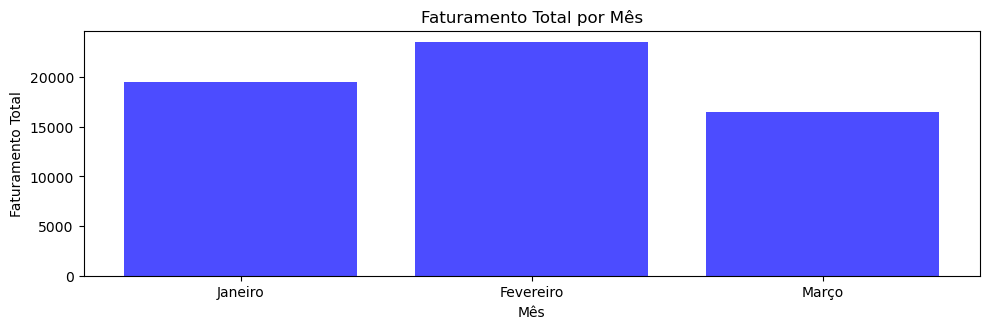

In [14]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)  # 2 linhas, 1 coluna, primeiro gráfico
plt.bar(df['Mês'], df['Faturamento Total'], color='blue', alpha=0.7)
plt.title('Faturamento Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Faturamento Total')
plt.tight_layout()


In [15]:
plt.savefig('faturamento_lucro.png')
plt.close()

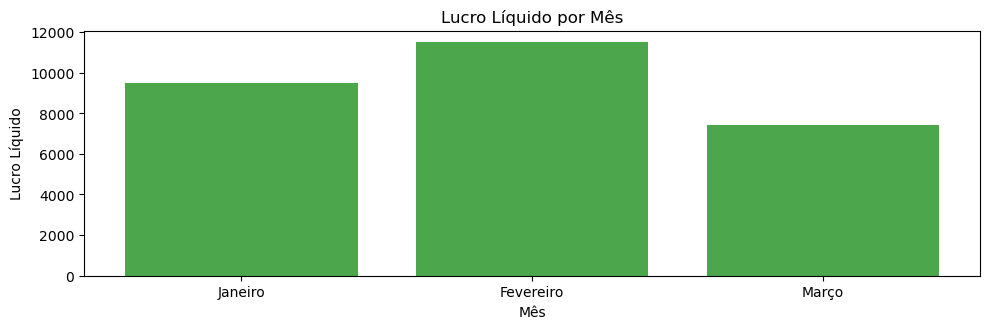

In [16]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, segundo gráfico
plt.bar(df['Mês'], df['Lucro Líquido'], color='green', alpha=0.7)
plt.title('Lucro Líquido por Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro Líquido')
plt.tight_layout()

In [17]:
plt.savefig('lucro_liquido.png')
plt.close()


In [18]:
doc.add_picture('faturamento_lucro.png', width=Inches(6))
doc.add_picture('lucro_liquido.png', width=Inches(6))


In [20]:
doc.save('relatorio_financeiro_contento.docx')